# Car performance Regression based ANN

### Step I: Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

### Step II: Reading the dataset

In [2]:
dataset = pd.read_csv(r"D:\AI\datasets\car performance-dataset.csv")
dataset.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Step III: Checking for null values

In [3]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

###### Since there are no null values, there is no need to re-shape and modify the dataset

### Step IV: seperating the dataset into x and y values

In [4]:
x = dataset.iloc[:,1:8].values
y = dataset.iloc[:,0].values
x.shape

(398, 7)

There is no need to take the name of the car as input hence there is no need for column transformation 
Here the cylinders, displacwment, horsepower, weight, acceleration, model year and orgin that is columns 2-8 are taken as input (x) while mpg (First Column) is taken as the output (y).

In [5]:
y.shape

(398,)

### Step V: Spliting the data into train and test data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Step VI: Feature Scaling of the input matrix (normalizing the values)

In [7]:
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

In [8]:
x_train.shape

(278, 7)

### Step VII: Model Building

#### Model Features

1) 7 neurons in the input layer because the input matrix has 7 columns.

2) 4 hidden layer with 14,28,28,14 neurons repectively.

3) 1 output layer because the y matrix has 1 column.

4) All the layer have 'random_ uniform' as initilizer and 'relu' activation function.

5) Optimizer: adam and loss: Mean_Absolute_Error loss function

6) batch_size: 24 and no. of epochs: 10000

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_4 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 15        
Total params: 1,821
Trainable params: 1,821
Non-trainable params: 0
______________________________________________________

In [8]:
model = Sequential()

In [9]:
model.add(Dense(units = 7,kernel_initializer = 'random_uniform',activation = 'relu'))  # input layer
model.add(Dense(units = 14,kernel_initializer = 'random_uniform',activation = 'relu')) # First hidden layer
model.add(Dense(units = 28,kernel_initializer = 'random_uniform',activation = 'relu')) # Second Hidden layer
model.add(Dense(units = 28,kernel_initializer = 'random_uniform',activation = 'relu')) # Third hideen Layer
model.add(Dense(units = 14,kernel_initializer = 'random_uniform',activation = 'relu')) # Fourth Hidden Layer
model.add(Dense(units = 1,kernel_initializer = 'random_uniform'))                      # Output Layer
model.compile (optimizer = 'adam',loss = 'mae',metrics = ['mae'])                      # Compile

In [10]:
history = model.fit(x_train,y_train ,batch_size = 24, epochs = 10000,validation_data = (x_test,y_test) )

Epoch 1/10000
12/12 [==============================] - 2s 19ms/step - loss: 23.3586 - mae: 23.3586 - val_loss: 23.8456 - val_mae: 23.8456
Epoch 2/10000
12/12 [==============================] - 0s 3ms/step - loss: 23.3416 - mae: 23.3416 - val_loss: 23.8255 - val_mae: 23.8255
Epoch 3/10000
12/12 [==============================] - 0s 3ms/step - loss: 23.3175 - mae: 23.3175 - val_loss: 23.7946 - val_mae: 23.7946
Epoch 4/10000
12/12 [==============================] - 0s 3ms/step - loss: 23.2768 - mae: 23.2768 - val_loss: 23.7362 - val_mae: 23.7362
Epoch 5/10000
12/12 [==============================] - 0s 3ms/step - loss: 23.1913 - mae: 23.1913 - val_loss: 23.6018 - val_mae: 23.6018
Epoch 6/10000
12/12 [==============================] - 0s 3ms/step - loss: 22.9819 - mae: 22.9819 - val_loss: 23.2544 - val_mae: 23.2544
Epoch 7/10000
12/12 [==============================] - 0s 3ms/step - loss: 22.4363 - mae: 22.4363 - val_loss: 22.3515 - val_mae: 22.3515
Epoch 8/10000
12/12 [===================

Epoch 62/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.0028 - mae: 2.0028 - val_loss: 2.1209 - val_mae: 2.1209
Epoch 63/10000
12/12 [==============================] - 0s 3ms/step - loss: 2.0025 - mae: 2.0025 - val_loss: 2.2099 - val_mae: 2.2099
Epoch 64/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.9861 - mae: 1.9861 - val_loss: 2.1336 - val_mae: 2.1336
Epoch 65/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.9934 - mae: 1.9934 - val_loss: 2.1500 - val_mae: 2.1500
Epoch 66/10000
12/12 [==============================] - 0s 2ms/step - loss: 2.0450 - mae: 2.0450 - val_loss: 2.2322 - val_mae: 2.2322
Epoch 67/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.9770 - mae: 1.9770 - val_loss: 2.1341 - val_mae: 2.1341
Epoch 68/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.9982 - mae: 1.9982 - val_loss: 2.2186 - val_mae: 2.2186
Epoch 69/10000
12/12 [==============================] - 0s 3ms

Epoch 183/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8799 - mae: 1.8799 - val_loss: 2.1143 - val_mae: 2.1143
Epoch 184/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8767 - mae: 1.8767 - val_loss: 2.1301 - val_mae: 2.1301
Epoch 185/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8794 - mae: 1.8794 - val_loss: 2.0736 - val_mae: 2.0736
Epoch 186/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8735 - mae: 1.8735 - val_loss: 2.0551 - val_mae: 2.0551
Epoch 187/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8927 - mae: 1.8927 - val_loss: 2.0412 - val_mae: 2.0412
Epoch 188/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.9150 - mae: 1.9150 - val_loss: 2.0476 - val_mae: 2.0476
Epoch 189/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.8796 - mae: 1.8796 - val_loss: 2.1674 - val_mae: 2.1674
Epoch 190/10000
12/12 [==============================] 

Epoch 304/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8998 - mae: 1.8998 - val_loss: 2.0449 - val_mae: 2.0449
Epoch 305/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8357 - mae: 1.8357 - val_loss: 2.1030 - val_mae: 2.1030
Epoch 306/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8211 - mae: 1.8211 - val_loss: 2.0561 - val_mae: 2.0561
Epoch 307/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8041 - mae: 1.8041 - val_loss: 2.0694 - val_mae: 2.0694
Epoch 308/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7922 - mae: 1.7922 - val_loss: 2.0590 - val_mae: 2.0590
Epoch 309/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7905 - mae: 1.7905 - val_loss: 2.0451 - val_mae: 2.0451
Epoch 310/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7943 - mae: 1.7943 - val_loss: 2.0903 - val_mae: 2.0903
Epoch 311/10000
12/12 [==============================] 

Epoch 425/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7747 - mae: 1.7747 - val_loss: 2.1039 - val_mae: 2.1039
Epoch 426/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7636 - mae: 1.7636 - val_loss: 2.0694 - val_mae: 2.0694
Epoch 427/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7712 - mae: 1.7712 - val_loss: 2.0745 - val_mae: 2.0745
Epoch 428/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7518 - mae: 1.7518 - val_loss: 2.1458 - val_mae: 2.1458
Epoch 429/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7925 - mae: 1.7925 - val_loss: 2.0572 - val_mae: 2.0572
Epoch 430/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.8034 - mae: 1.8034 - val_loss: 2.0618 - val_mae: 2.0618
Epoch 431/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.8176 - mae: 1.8176 - val_loss: 2.1879 - val_mae: 2.1879
Epoch 432/10000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 1.7381 - mae: 1.7381 - val_loss: 2.0536 - val_mae: 2.0536
Epoch 546/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7393 - mae: 1.7393 - val_loss: 2.0359 - val_mae: 2.0359
Epoch 547/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7423 - mae: 1.7423 - val_loss: 2.0784 - val_mae: 2.0784
Epoch 548/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7345 - mae: 1.7345 - val_loss: 2.0623 - val_mae: 2.0623
Epoch 549/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7307 - mae: 1.7307 - val_loss: 2.0305 - val_mae: 2.0305
Epoch 550/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7316 - mae: 1.7316 - val_loss: 2.0463 - val_mae: 2.0463
Epoch 551/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7406 - mae: 1.7406 - val_loss: 2.0750 - val_mae: 2.0750
Epoch 552/10000
12/12 [==============================] - 0s 3ms/step - 

Epoch 606/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7270 - mae: 1.7270 - val_loss: 2.0160 - val_mae: 2.0160
Epoch 607/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7311 - mae: 1.7311 - val_loss: 2.1036 - val_mae: 2.1036
Epoch 608/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7517 - mae: 1.7517 - val_loss: 2.0198 - val_mae: 2.0198
Epoch 609/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7309 - mae: 1.7309 - val_loss: 2.0536 - val_mae: 2.0536
Epoch 610/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7280 - mae: 1.7280 - val_loss: 2.0628 - val_mae: 2.0628
Epoch 611/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7146 - mae: 1.7146 - val_loss: 2.0375 - val_mae: 2.0375
Epoch 612/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7313 - mae: 1.7313 - val_loss: 2.0604 - val_mae: 2.0604
Epoch 613/10000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 1.7507 - mae: 1.7507 - val_loss: 2.0014 - val_mae: 2.0014
Epoch 727/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7215 - mae: 1.7215 - val_loss: 2.0122 - val_mae: 2.0122
Epoch 728/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7047 - mae: 1.7047 - val_loss: 2.0492 - val_mae: 2.0492
Epoch 729/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7019 - mae: 1.7019 - val_loss: 2.0230 - val_mae: 2.0230
Epoch 730/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7115 - mae: 1.7115 - val_loss: 2.0318 - val_mae: 2.0318
Epoch 731/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7096 - mae: 1.7096 - val_loss: 2.0027 - val_mae: 2.0027
Epoch 732/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7205 - mae: 1.7205 - val_loss: 1.9856 - val_mae: 1.9856
Epoch 733/10000
12/12 [==============================] - 0s 3ms/step - 

Epoch 847/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6826 - mae: 1.6826 - val_loss: 2.0097 - val_mae: 2.0097
Epoch 848/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6925 - mae: 1.6925 - val_loss: 2.0069 - val_mae: 2.0069
Epoch 849/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7017 - mae: 1.7017 - val_loss: 2.0406 - val_mae: 2.0406
Epoch 850/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6977 - mae: 1.6977 - val_loss: 2.0874 - val_mae: 2.0874
Epoch 851/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6951 - mae: 1.6951 - val_loss: 2.0041 - val_mae: 2.0041
Epoch 852/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7060 - mae: 1.7060 - val_loss: 2.0073 - val_mae: 2.0073
Epoch 853/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7142 - mae: 1.7142 - val_loss: 1.9975 - val_mae: 1.9975
Epoch 854/10000
12/12 [==============================] 

Epoch 968/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6924 - mae: 1.6924 - val_loss: 1.9915 - val_mae: 1.9915
Epoch 969/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6683 - mae: 1.6683 - val_loss: 2.0954 - val_mae: 2.0954
Epoch 970/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7111 - mae: 1.7111 - val_loss: 1.9811 - val_mae: 1.9811
Epoch 971/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6865 - mae: 1.6865 - val_loss: 2.0462 - val_mae: 2.0462
Epoch 972/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6817 - mae: 1.6817 - val_loss: 1.9912 - val_mae: 1.9912
Epoch 973/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7015 - mae: 1.7015 - val_loss: 2.0250 - val_mae: 2.0250
Epoch 974/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7121 - mae: 1.7121 - val_loss: 2.1033 - val_mae: 2.1033
Epoch 975/10000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 1.6926 - mae: 1.6926 - val_loss: 2.1597 - val_mae: 2.1597
Epoch 1089/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7055 - mae: 1.7055 - val_loss: 1.9952 - val_mae: 1.9952
Epoch 1090/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6680 - mae: 1.6680 - val_loss: 2.0321 - val_mae: 2.0321
Epoch 1091/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6730 - mae: 1.6730 - val_loss: 1.9798 - val_mae: 1.9798
Epoch 1092/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6777 - mae: 1.6777 - val_loss: 2.1058 - val_mae: 2.1058
Epoch 1093/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7239 - mae: 1.7239 - val_loss: 1.9851 - val_mae: 1.9851
Epoch 1094/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6800 - mae: 1.6800 - val_loss: 2.0034 - val_mae: 2.0034
Epoch 1095/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.6515 - mae: 1.6515 - val_loss: 2.0404 - val_mae: 2.0404
Epoch 1149/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6772 - mae: 1.6772 - val_loss: 2.0633 - val_mae: 2.0633
Epoch 1150/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6581 - mae: 1.6581 - val_loss: 2.0657 - val_mae: 2.0657
Epoch 1151/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6860 - mae: 1.6860 - val_loss: 2.0037 - val_mae: 2.0037
Epoch 1152/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6480 - mae: 1.6480 - val_loss: 2.0363 - val_mae: 2.0363
Epoch 1153/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6561 - mae: 1.6561 - val_loss: 1.9961 - val_mae: 1.9961
Epoch 1154/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6557 - mae: 1.6557 - val_loss: 2.0147 - val_mae: 2.0147
Epoch 1155/10000
12/12 [==============================] - 0s 3ms/

Epoch 1208/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6217 - mae: 1.6217 - val_loss: 2.0081 - val_mae: 2.0081
Epoch 1209/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6504 - mae: 1.6504 - val_loss: 2.0148 - val_mae: 2.0148
Epoch 1210/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6359 - mae: 1.6359 - val_loss: 2.0700 - val_mae: 2.0700
Epoch 1211/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6459 - mae: 1.6459 - val_loss: 2.0433 - val_mae: 2.0433
Epoch 1212/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6928 - mae: 1.6928 - val_loss: 2.0572 - val_mae: 2.0572
Epoch 1213/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7950 - mae: 1.7950 - val_loss: 2.2198 - val_mae: 2.2198
Epoch 1214/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.7246 - mae: 1.7246 - val_loss: 2.0027 - val_mae: 2.0027
Epoch 1215/10000
12/12 [========================

Epoch 1268/10000
12/12 [==============================] - ETA: 0s - loss: 2.0714 - mae: 2.071 - 0s 3ms/step - loss: 1.6959 - mae: 1.6959 - val_loss: 2.0313 - val_mae: 2.0313
Epoch 1269/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6320 - mae: 1.6320 - val_loss: 2.0696 - val_mae: 2.0696
Epoch 1270/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6150 - mae: 1.6150 - val_loss: 2.1125 - val_mae: 2.1125
Epoch 1271/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6924 - mae: 1.6924 - val_loss: 2.0480 - val_mae: 2.0480
Epoch 1272/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6231 - mae: 1.6231 - val_loss: 2.0505 - val_mae: 2.0505
Epoch 1273/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6472 - mae: 1.6472 - val_loss: 2.1184 - val_mae: 2.1184
Epoch 1274/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6213 - mae: 1.6213 - val_loss: 2.1010 - val_mae: 2.1010
Epoch 1275

Epoch 1328/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6262 - mae: 1.6262 - val_loss: 2.0346 - val_mae: 2.0346
Epoch 1329/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6496 - mae: 1.6496 - val_loss: 2.1137 - val_mae: 2.1137
Epoch 1330/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6172 - mae: 1.6172 - val_loss: 2.1043 - val_mae: 2.1043
Epoch 1331/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6331 - mae: 1.6331 - val_loss: 2.0384 - val_mae: 2.0384
Epoch 1332/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6195 - mae: 1.6195 - val_loss: 2.0582 - val_mae: 2.0582
Epoch 1333/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6029 - mae: 1.6029 - val_loss: 2.0458 - val_mae: 2.0458
Epoch 1334/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6375 - mae: 1.6375 - val_loss: 2.0492 - val_mae: 2.0492
Epoch 1335/10000
12/12 [========================

12/12 [==============================] - 0s 4ms/step - loss: 1.6041 - mae: 1.6041 - val_loss: 2.0723 - val_mae: 2.0723
Epoch 1448/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6183 - mae: 1.6183 - val_loss: 2.0318 - val_mae: 2.0318
Epoch 1449/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6413 - mae: 1.6413 - val_loss: 2.0337 - val_mae: 2.0337
Epoch 1450/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5842 - mae: 1.5842 - val_loss: 2.1317 - val_mae: 2.1317
Epoch 1451/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6503 - mae: 1.6503 - val_loss: 2.1259 - val_mae: 2.1259
Epoch 1452/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.6768 - mae: 1.6768 - val_loss: 2.0458 - val_mae: 2.0458
Epoch 1453/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6182 - mae: 1.6182 - val_loss: 2.0653 - val_mae: 2.0653
Epoch 1454/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5989 - mae: 1.5989 - val_loss: 2.1009 - val_mae: 2.1009
Epoch 1568/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5834 - mae: 1.5834 - val_loss: 2.0781 - val_mae: 2.0781
Epoch 1569/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5892 - mae: 1.5892 - val_loss: 2.1389 - val_mae: 2.1389
Epoch 1570/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5902 - mae: 1.5902 - val_loss: 2.1105 - val_mae: 2.1105
Epoch 1571/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5749 - mae: 1.5749 - val_loss: 2.1174 - val_mae: 2.1174
Epoch 1572/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5548 - mae: 1.5548 - val_loss: 2.1214 - val_mae: 2.1214
Epoch 1573/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5625 - mae: 1.5625 - val_loss: 2.1271 - val_mae: 2.1271
Epoch 1574/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5485 - mae: 1.5485 - val_loss: 2.1032 - val_mae: 2.1032
Epoch 1688/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5638 - mae: 1.5638 - val_loss: 2.1962 - val_mae: 2.1962
Epoch 1689/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5820 - mae: 1.5820 - val_loss: 2.0988 - val_mae: 2.0988
Epoch 1690/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5501 - mae: 1.5501 - val_loss: 2.1263 - val_mae: 2.1263
Epoch 1691/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5500 - mae: 1.5500 - val_loss: 2.0898 - val_mae: 2.0898
Epoch 1692/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5432 - mae: 1.5432 - val_loss: 2.1432 - val_mae: 2.1432
Epoch 1693/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5915 - mae: 1.5915 - val_loss: 2.1128 - val_mae: 2.1128
Epoch 1694/10000
12/12 [==============================] - 0s 3ms/

Epoch 1747/10000
12/12 [==============================] - ETA: 0s - loss: 2.0811 - mae: 2.081 - 0s 2ms/step - loss: 1.5459 - mae: 1.5459 - val_loss: 2.1237 - val_mae: 2.1237
Epoch 1748/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5896 - mae: 1.5896 - val_loss: 2.0882 - val_mae: 2.0882
Epoch 1749/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5531 - mae: 1.5531 - val_loss: 2.1036 - val_mae: 2.1036
Epoch 1750/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5567 - mae: 1.5567 - val_loss: 2.1094 - val_mae: 2.1094
Epoch 1751/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5643 - mae: 1.5643 - val_loss: 2.0915 - val_mae: 2.0915
Epoch 1752/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6048 - mae: 1.6048 - val_loss: 2.0826 - val_mae: 2.0826
Epoch 1753/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5939 - mae: 1.5939 - val_loss: 2.2193 - val_mae: 2.2193
Epoch 1754

Epoch 1807/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5608 - mae: 1.5608 - val_loss: 2.1664 - val_mae: 2.1664
Epoch 1808/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5691 - mae: 1.5691 - val_loss: 2.0950 - val_mae: 2.0950
Epoch 1809/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6067 - mae: 1.6067 - val_loss: 2.1127 - val_mae: 2.1127
Epoch 1810/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.7709 - mae: 1.7709 - val_loss: 2.1611 - val_mae: 2.1611
Epoch 1811/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6075 - mae: 1.6075 - val_loss: 2.1804 - val_mae: 2.1804
Epoch 1812/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5599 - mae: 1.5599 - val_loss: 2.1047 - val_mae: 2.1047
Epoch 1813/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5547 - mae: 1.5547 - val_loss: 2.1203 - val_mae: 2.1203
Epoch 1814/10000
12/12 [========================

Epoch 1867/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5694 - mae: 1.5694 - val_loss: 2.0879 - val_mae: 2.0879
Epoch 1868/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5695 - mae: 1.5695 - val_loss: 2.1570 - val_mae: 2.1570
Epoch 1869/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5584 - mae: 1.5584 - val_loss: 2.1195 - val_mae: 2.1195
Epoch 1870/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5619 - mae: 1.5619 - val_loss: 2.1335 - val_mae: 2.1335
Epoch 1871/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5836 - mae: 1.5836 - val_loss: 2.0778 - val_mae: 2.0778
Epoch 1872/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6046 - mae: 1.6046 - val_loss: 2.0750 - val_mae: 2.0750
Epoch 1873/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6245 - mae: 1.6245 - val_loss: 2.1039 - val_mae: 2.1039
Epoch 1874/10000
12/12 [========================

Epoch 1927/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5499 - mae: 1.5499 - val_loss: 2.1164 - val_mae: 2.1164
Epoch 1928/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5573 - mae: 1.5573 - val_loss: 2.1409 - val_mae: 2.1409
Epoch 1929/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5442 - mae: 1.5442 - val_loss: 2.2165 - val_mae: 2.2165
Epoch 1930/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5851 - mae: 1.5851 - val_loss: 2.0698 - val_mae: 2.0698
Epoch 1931/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5585 - mae: 1.5585 - val_loss: 2.1092 - val_mae: 2.1092
Epoch 1932/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5431 - mae: 1.5431 - val_loss: 2.1609 - val_mae: 2.1609
Epoch 1933/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5530 - mae: 1.5530 - val_loss: 2.0953 - val_mae: 2.0953
Epoch 1934/10000
12/12 [========================

Epoch 2047/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6261 - mae: 1.6261 - val_loss: 2.0901 - val_mae: 2.0901
Epoch 2048/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5678 - mae: 1.5678 - val_loss: 2.1085 - val_mae: 2.1085
Epoch 2049/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5365 - mae: 1.5365 - val_loss: 2.0748 - val_mae: 2.0748
Epoch 2050/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5695 - mae: 1.5695 - val_loss: 2.0931 - val_mae: 2.0931
Epoch 2051/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5781 - mae: 1.5781 - val_loss: 2.1088 - val_mae: 2.1088
Epoch 2052/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5554 - mae: 1.5554 - val_loss: 2.1348 - val_mae: 2.1348
Epoch 2053/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5552 - mae: 1.5552 - val_loss: 2.1340 - val_mae: 2.1340
Epoch 2054/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.6227 - mae: 1.6227 - val_loss: 2.1083 - val_mae: 2.1083
Epoch 2168/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6126 - mae: 1.6126 - val_loss: 2.1788 - val_mae: 2.1788
Epoch 2169/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5398 - mae: 1.5398 - val_loss: 2.0969 - val_mae: 2.0969
Epoch 2170/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5446 - mae: 1.5446 - val_loss: 2.0808 - val_mae: 2.0808
Epoch 2171/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5719 - mae: 1.5719 - val_loss: 2.0755 - val_mae: 2.0755
Epoch 2172/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5580 - mae: 1.5580 - val_loss: 2.1170 - val_mae: 2.1170
Epoch 2173/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5502 - mae: 1.5502 - val_loss: 2.1451 - val_mae: 2.1451
Epoch 2174/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5662 - mae: 1.5662 - val_loss: 2.0837 - val_mae: 2.0837
Epoch 2287/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5552 - mae: 1.5552 - val_loss: 2.1436 - val_mae: 2.1436
Epoch 2288/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5588 - mae: 1.5588 - val_loss: 2.1324 - val_mae: 2.1324
Epoch 2289/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6001 - mae: 1.6001 - val_loss: 2.0765 - val_mae: 2.0765
Epoch 2290/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5990 - mae: 1.5990 - val_loss: 2.1063 - val_mae: 2.1063
Epoch 2291/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5495 - mae: 1.5495 - val_loss: 2.1026 - val_mae: 2.1026
Epoch 2292/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5344 - mae: 1.5344 - val_loss: 2.1273 - val_mae: 2.1273
Epoch 2293/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5464 - mae: 1.5464 - val_loss: 2.1029 - val_mae: 2.1029
Epoch 2407/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5442 - mae: 1.5442 - val_loss: 2.0859 - val_mae: 2.0859
Epoch 2408/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5398 - mae: 1.5398 - val_loss: 2.1106 - val_mae: 2.1106
Epoch 2409/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5448 - mae: 1.5448 - val_loss: 2.0969 - val_mae: 2.0969
Epoch 2410/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5537 - mae: 1.5537 - val_loss: 2.1087 - val_mae: 2.1087
Epoch 2411/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5822 - mae: 1.5822 - val_loss: 2.1329 - val_mae: 2.1329
Epoch 2412/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5457 - mae: 1.5457 - val_loss: 2.1382 - val_mae: 2.1382
Epoch 2413/10000
12/12 [==============================] - 0s 3ms/

Epoch 2466/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5391 - mae: 1.5391 - val_loss: 2.1363 - val_mae: 2.1363
Epoch 2467/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5601 - mae: 1.5601 - val_loss: 2.0957 - val_mae: 2.0957
Epoch 2468/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5795 - mae: 1.5795 - val_loss: 2.0874 - val_mae: 2.0874
Epoch 2469/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5436 - mae: 1.5436 - val_loss: 2.1082 - val_mae: 2.1082
Epoch 2470/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5293 - mae: 1.5293 - val_loss: 2.2164 - val_mae: 2.2164
Epoch 2471/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6135 - mae: 1.6135 - val_loss: 2.0904 - val_mae: 2.0904
Epoch 2472/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5601 - mae: 1.5601 - val_loss: 2.0836 - val_mae: 2.0836
Epoch 2473/10000
12/12 [========================

12/12 [==============================] - 0s 2ms/step - loss: 1.5379 - mae: 1.5379 - val_loss: 2.1161 - val_mae: 2.1161
Epoch 2586/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5210 - mae: 1.5210 - val_loss: 2.1651 - val_mae: 2.1651
Epoch 2587/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5387 - mae: 1.5387 - val_loss: 2.1288 - val_mae: 2.1288
Epoch 2588/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5470 - mae: 1.5470 - val_loss: 2.0899 - val_mae: 2.0899
Epoch 2589/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5500 - mae: 1.5500 - val_loss: 2.1426 - val_mae: 2.1426
Epoch 2590/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5609 - mae: 1.5609 - val_loss: 2.1232 - val_mae: 2.1232
Epoch 2591/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5252 - mae: 1.5252 - val_loss: 2.1652 - val_mae: 2.1652
Epoch 2592/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5956 - mae: 1.5956 - val_loss: 2.1102 - val_mae: 2.1102
Epoch 2706/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5631 - mae: 1.5631 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 2707/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5637 - mae: 1.5637 - val_loss: 2.1016 - val_mae: 2.1016
Epoch 2708/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5349 - mae: 1.5349 - val_loss: 2.1537 - val_mae: 2.1537
Epoch 2709/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5349 - mae: 1.5349 - val_loss: 2.1888 - val_mae: 2.1888
Epoch 2710/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5594 - mae: 1.5594 - val_loss: 2.1213 - val_mae: 2.1213
Epoch 2711/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5250 - mae: 1.5250 - val_loss: 2.1185 - val_mae: 2.1185
Epoch 2712/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5583 - mae: 1.5583 - val_loss: 2.1136 - val_mae: 2.1136
Epoch 2826/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5349 - mae: 1.5349 - val_loss: 2.1184 - val_mae: 2.1184
Epoch 2827/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5552 - mae: 1.5552 - val_loss: 2.1360 - val_mae: 2.1360
Epoch 2828/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6012 - mae: 1.6012 - val_loss: 2.2991 - val_mae: 2.2991
Epoch 2829/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6430 - mae: 1.6430 - val_loss: 2.1597 - val_mae: 2.1597
Epoch 2830/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5626 - mae: 1.5626 - val_loss: 2.0881 - val_mae: 2.0881
Epoch 2831/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5429 - mae: 1.5429 - val_loss: 2.1083 - val_mae: 2.1083
Epoch 2832/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5567 - mae: 1.5567 - val_loss: 2.0942 - val_mae: 2.0942
Epoch 2946/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5190 - mae: 1.5190 - val_loss: 2.1182 - val_mae: 2.1182
Epoch 2947/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5198 - mae: 1.5198 - val_loss: 2.1134 - val_mae: 2.1134
Epoch 2948/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5271 - mae: 1.5271 - val_loss: 2.1398 - val_mae: 2.1398
Epoch 2949/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5375 - mae: 1.5375 - val_loss: 2.1492 - val_mae: 2.1492
Epoch 2950/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5168 - mae: 1.5168 - val_loss: 2.1235 - val_mae: 2.1235
Epoch 2951/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5196 - mae: 1.5196 - val_loss: 2.1462 - val_mae: 2.1462
Epoch 2952/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5623 - mae: 1.5623 - val_loss: 2.1771 - val_mae: 2.1771
Epoch 3006/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5346 - mae: 1.5346 - val_loss: 2.1500 - val_mae: 2.1500
Epoch 3007/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5217 - mae: 1.5217 - val_loss: 2.1188 - val_mae: 2.1188
Epoch 3008/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5596 - mae: 1.5596 - val_loss: 2.2914 - val_mae: 2.2914
Epoch 3009/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5666 - mae: 1.5666 - val_loss: 2.1224 - val_mae: 2.1224
Epoch 3010/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5454 - mae: 1.5454 - val_loss: 2.1890 - val_mae: 2.1890
Epoch 3011/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5360 - mae: 1.5360 - val_loss: 2.1574 - val_mae: 2.1574
Epoch 3012/10000
12/12 [==============================] - 0s 4ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5279 - mae: 1.5279 - val_loss: 2.1268 - val_mae: 2.1268
Epoch 3066/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5257 - mae: 1.5257 - val_loss: 2.1363 - val_mae: 2.1363
Epoch 3067/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5369 - mae: 1.5369 - val_loss: 2.1279 - val_mae: 2.1279
Epoch 3068/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5249 - mae: 1.5249 - val_loss: 2.1465 - val_mae: 2.1465
Epoch 3069/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5111 - mae: 1.5111 - val_loss: 2.2584 - val_mae: 2.2584
Epoch 3070/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5683 - mae: 1.5683 - val_loss: 2.1123 - val_mae: 2.1123
Epoch 3071/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5665 - mae: 1.5665 - val_loss: 2.1197 - val_mae: 2.1197
Epoch 3072/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5176 - mae: 1.5176 - val_loss: 2.1404 - val_mae: 2.1404
Epoch 3186/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5046 - mae: 1.5046 - val_loss: 2.1444 - val_mae: 2.1444
Epoch 3187/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5488 - mae: 1.5488 - val_loss: 2.1349 - val_mae: 2.1349
Epoch 3188/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5371 - mae: 1.5371 - val_loss: 2.1501 - val_mae: 2.1501
Epoch 3189/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5362 - mae: 1.5362 - val_loss: 2.1892 - val_mae: 2.1892
Epoch 3190/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5684 - mae: 1.5684 - val_loss: 2.1325 - val_mae: 2.1325
Epoch 3191/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5604 - mae: 1.5604 - val_loss: 2.1176 - val_mae: 2.1176
Epoch 3192/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5733 - mae: 1.5733 - val_loss: 2.1889 - val_mae: 2.1889
Epoch 3246/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5188 - mae: 1.5188 - val_loss: 2.1176 - val_mae: 2.1176
Epoch 3247/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5367 - mae: 1.5367 - val_loss: 2.1264 - val_mae: 2.1264
Epoch 3248/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5516 - mae: 1.5516 - val_loss: 2.1453 - val_mae: 2.1453
Epoch 3249/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5997 - mae: 1.5997 - val_loss: 2.2590 - val_mae: 2.2590
Epoch 3250/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5548 - mae: 1.5548 - val_loss: 2.1642 - val_mae: 2.1642
Epoch 3251/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5537 - mae: 1.5537 - val_loss: 2.1473 - val_mae: 2.1473
Epoch 3252/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5108 - mae: 1.5108 - val_loss: 2.1603 - val_mae: 2.1603
Epoch 3306/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5242 - mae: 1.5242 - val_loss: 2.1371 - val_mae: 2.1371
Epoch 3307/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.5299 - mae: 1.5299 - val_loss: 2.1069 - val_mae: 2.1069
Epoch 3308/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5319 - mae: 1.5319 - val_loss: 2.1876 - val_mae: 2.1876
Epoch 3309/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5286 - mae: 1.5286 - val_loss: 2.1190 - val_mae: 2.1190
Epoch 3310/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5322 - mae: 1.5322 - val_loss: 2.1298 - val_mae: 2.1298
Epoch 3311/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5212 - mae: 1.5212 - val_loss: 2.1490 - val_mae: 2.1490
Epoch 3312/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5430 - mae: 1.5430 - val_loss: 2.1695 - val_mae: 2.1695
Epoch 3426/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5344 - mae: 1.5344 - val_loss: 2.2066 - val_mae: 2.2066
Epoch 3427/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5521 - mae: 1.5521 - val_loss: 2.1252 - val_mae: 2.1252
Epoch 3428/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5361 - mae: 1.5361 - val_loss: 2.1220 - val_mae: 2.1220
Epoch 3429/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5267 - mae: 1.5267 - val_loss: 2.1854 - val_mae: 2.1854
Epoch 3430/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5084 - mae: 1.5084 - val_loss: 2.1112 - val_mae: 2.1112
Epoch 3431/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5580 - mae: 1.5580 - val_loss: 2.1405 - val_mae: 2.1405
Epoch 3432/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5524 - mae: 1.5524 - val_loss: 2.1338 - val_mae: 2.1338
Epoch 3486/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5395 - mae: 1.5395 - val_loss: 2.1171 - val_mae: 2.1171
Epoch 3487/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5770 - mae: 1.5770 - val_loss: 2.1226 - val_mae: 2.1226
Epoch 3488/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5377 - mae: 1.5377 - val_loss: 2.1540 - val_mae: 2.1540
Epoch 3489/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5617 - mae: 1.5617 - val_loss: 2.1862 - val_mae: 2.1862
Epoch 3490/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5236 - mae: 1.5236 - val_loss: 2.1687 - val_mae: 2.1687
Epoch 3491/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5254 - mae: 1.5254 - val_loss: 2.1543 - val_mae: 2.1543
Epoch 3492/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5603 - mae: 1.5603 - val_loss: 2.1632 - val_mae: 2.1632
Epoch 3606/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5865 - mae: 1.5865 - val_loss: 2.2205 - val_mae: 2.2205
Epoch 3607/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5448 - mae: 1.5448 - val_loss: 2.1470 - val_mae: 2.1470
Epoch 3608/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5406 - mae: 1.5406 - val_loss: 2.1709 - val_mae: 2.1709
Epoch 3609/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5263 - mae: 1.5263 - val_loss: 2.1312 - val_mae: 2.1312
Epoch 3610/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5449 - mae: 1.5449 - val_loss: 2.2013 - val_mae: 2.2013
Epoch 3611/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5677 - mae: 1.5677 - val_loss: 2.1337 - val_mae: 2.1337
Epoch 3612/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5346 - mae: 1.5346 - val_loss: 2.1418 - val_mae: 2.1418
Epoch 3726/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5460 - mae: 1.5460 - val_loss: 2.1281 - val_mae: 2.1281
Epoch 3727/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5581 - mae: 1.5581 - val_loss: 2.1622 - val_mae: 2.1622
Epoch 3728/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5245 - mae: 1.5245 - val_loss: 2.1313 - val_mae: 2.1313
Epoch 3729/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5060 - mae: 1.5060 - val_loss: 2.1817 - val_mae: 2.1817
Epoch 3730/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5135 - mae: 1.5135 - val_loss: 2.1434 - val_mae: 2.1434
Epoch 3731/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5112 - mae: 1.5112 - val_loss: 2.1574 - val_mae: 2.1574
Epoch 3732/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5295 - mae: 1.5295 - val_loss: 2.1690 - val_mae: 2.1690
Epoch 3846/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5213 - mae: 1.5213 - val_loss: 2.1752 - val_mae: 2.1752
Epoch 3847/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5491 - mae: 1.5491 - val_loss: 2.2120 - val_mae: 2.2120
Epoch 3848/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5238 - mae: 1.5238 - val_loss: 2.1447 - val_mae: 2.1447
Epoch 3849/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5351 - mae: 1.5351 - val_loss: 2.1554 - val_mae: 2.1554
Epoch 3850/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5758 - mae: 1.5758 - val_loss: 2.1540 - val_mae: 2.1540
Epoch 3851/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5665 - mae: 1.5665 - val_loss: 2.1957 - val_mae: 2.1957
Epoch 3852/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5756 - mae: 1.5756 - val_loss: 2.1236 - val_mae: 2.1236
Epoch 3966/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5329 - mae: 1.5329 - val_loss: 2.1254 - val_mae: 2.1254
Epoch 3967/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5207 - mae: 1.5207 - val_loss: 2.1632 - val_mae: 2.1632
Epoch 3968/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5233 - mae: 1.5233 - val_loss: 2.1846 - val_mae: 2.1846
Epoch 3969/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5601 - mae: 1.5601 - val_loss: 2.1266 - val_mae: 2.1266
Epoch 3970/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5230 - mae: 1.5230 - val_loss: 2.1347 - val_mae: 2.1347
Epoch 3971/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5703 - mae: 1.5703 - val_loss: 2.1315 - val_mae: 2.1315
Epoch 3972/10000
12/12 [==============================] - 0s 3ms/

Epoch 4025/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5351 - mae: 1.5351 - val_loss: 2.1642 - val_mae: 2.1642
Epoch 4026/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5551 - mae: 1.5551 - val_loss: 2.1317 - val_mae: 2.1317
Epoch 4027/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5274 - mae: 1.5274 - val_loss: 2.1397 - val_mae: 2.1397
Epoch 4028/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5646 - mae: 1.5646 - val_loss: 2.1561 - val_mae: 2.1561
Epoch 4029/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5478 - mae: 1.5478 - val_loss: 2.1376 - val_mae: 2.1376
Epoch 4030/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5172 - mae: 1.5172 - val_loss: 2.1509 - val_mae: 2.1509
Epoch 4031/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5233 - mae: 1.5233 - val_loss: 2.1821 - val_mae: 2.1821
Epoch 4032/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5831 - mae: 1.5831 - val_loss: 2.1296 - val_mae: 2.1296
Epoch 4146/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5269 - mae: 1.5269 - val_loss: 2.1489 - val_mae: 2.1489
Epoch 4147/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5176 - mae: 1.5176 - val_loss: 2.1343 - val_mae: 2.1343
Epoch 4148/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5232 - mae: 1.5232 - val_loss: 2.1082 - val_mae: 2.1082
Epoch 4149/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5696 - mae: 1.5696 - val_loss: 2.1199 - val_mae: 2.1199
Epoch 4150/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5477 - mae: 1.5477 - val_loss: 2.1261 - val_mae: 2.1261
Epoch 4151/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5638 - mae: 1.5638 - val_loss: 2.1348 - val_mae: 2.1348
Epoch 4152/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5321 - mae: 1.5321 - val_loss: 2.1628 - val_mae: 2.1628
Epoch 4266/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5087 - mae: 1.5087 - val_loss: 2.1312 - val_mae: 2.1312
Epoch 4267/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5554 - mae: 1.5554 - val_loss: 2.2086 - val_mae: 2.2086
Epoch 4268/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5302 - mae: 1.5302 - val_loss: 2.1668 - val_mae: 2.1668
Epoch 4269/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5144 - mae: 1.5144 - val_loss: 2.1522 - val_mae: 2.1522
Epoch 4270/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5294 - mae: 1.5294 - val_loss: 2.1644 - val_mae: 2.1644
Epoch 4271/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5329 - mae: 1.5329 - val_loss: 2.1793 - val_mae: 2.1793
Epoch 4272/10000
12/12 [==============================] - 0s 3ms/

Epoch 4325/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5363 - mae: 1.5363 - val_loss: 2.1101 - val_mae: 2.1101
Epoch 4326/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5235 - mae: 1.5235 - val_loss: 2.1287 - val_mae: 2.1287
Epoch 4327/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5137 - mae: 1.5137 - val_loss: 2.1287 - val_mae: 2.1287
Epoch 4328/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5153 - mae: 1.5153 - val_loss: 2.1394 - val_mae: 2.1394
Epoch 4329/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5190 - mae: 1.5190 - val_loss: 2.1437 - val_mae: 2.1437
Epoch 4330/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5277 - mae: 1.5277 - val_loss: 2.1885 - val_mae: 2.1885
Epoch 4331/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5132 - mae: 1.5132 - val_loss: 2.1383 - val_mae: 2.1383
Epoch 4332/10000
12/12 [========================

Epoch 4385/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5412 - mae: 1.5412 - val_loss: 2.1944 - val_mae: 2.1944
Epoch 4386/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5490 - mae: 1.5490 - val_loss: 2.1643 - val_mae: 2.1643
Epoch 4387/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5529 - mae: 1.5529 - val_loss: 2.1200 - val_mae: 2.1200
Epoch 4388/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5727 - mae: 1.5727 - val_loss: 2.1359 - val_mae: 2.1359
Epoch 4389/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5748 - mae: 1.5748 - val_loss: 2.1578 - val_mae: 2.1578
Epoch 4390/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5246 - mae: 1.5246 - val_loss: 2.1319 - val_mae: 2.1319
Epoch 4391/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5037 - mae: 1.5037 - val_loss: 2.1381 - val_mae: 2.1381
Epoch 4392/10000
12/12 [========================

Epoch 4445/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5104 - mae: 1.5104 - val_loss: 2.1808 - val_mae: 2.1808
Epoch 4446/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5668 - mae: 1.5668 - val_loss: 2.1239 - val_mae: 2.1239
Epoch 4447/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5589 - mae: 1.5589 - val_loss: 2.1392 - val_mae: 2.1392
Epoch 4448/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5331 - mae: 1.5331 - val_loss: 2.1522 - val_mae: 2.1522
Epoch 4449/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5346 - mae: 1.5346 - val_loss: 2.2249 - val_mae: 2.2249
Epoch 4450/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5262 - mae: 1.5262 - val_loss: 2.1273 - val_mae: 2.1273
Epoch 4451/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5208 - mae: 1.5208 - val_loss: 2.0985 - val_mae: 2.0985
Epoch 4452/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5262 - mae: 1.5262 - val_loss: 2.2011 - val_mae: 2.2011
Epoch 4565/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5520 - mae: 1.5520 - val_loss: 2.1968 - val_mae: 2.1968
Epoch 4566/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5427 - mae: 1.5427 - val_loss: 2.2039 - val_mae: 2.2039
Epoch 4567/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5295 - mae: 1.5295 - val_loss: 2.1279 - val_mae: 2.1279
Epoch 4568/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5370 - mae: 1.5370 - val_loss: 2.1166 - val_mae: 2.1166
Epoch 4569/10000
12/12 [==============================] - ETA: 0s - loss: 1.7062 - mae: 1.706 - 0s 3ms/step - loss: 1.5170 - mae: 1.5170 - val_loss: 2.1664 - val_mae: 2.1664
Epoch 4570/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5115 - mae: 1.5115 - val_loss: 2.1604 - val_mae: 2.1604
Epoch 4571/10000
12/12 [===

Epoch 4623/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5190 - mae: 1.5190 - val_loss: 2.1565 - val_mae: 2.1565
Epoch 4624/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5199 - mae: 1.5199 - val_loss: 2.1637 - val_mae: 2.1637
Epoch 4625/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5182 - mae: 1.5182 - val_loss: 2.1522 - val_mae: 2.1522
Epoch 4626/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5236 - mae: 1.5236 - val_loss: 2.1146 - val_mae: 2.1146
Epoch 4627/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5143 - mae: 1.5143 - val_loss: 2.1409 - val_mae: 2.1409
Epoch 4628/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5263 - mae: 1.5263 - val_loss: 2.1725 - val_mae: 2.1725
Epoch 4629/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4997 - mae: 1.4997 - val_loss: 2.1317 - val_mae: 2.1317
Epoch 4630/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5279 - mae: 1.5279 - val_loss: 2.1267 - val_mae: 2.1267
Epoch 4744/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5177 - mae: 1.5177 - val_loss: 2.1785 - val_mae: 2.1785
Epoch 4745/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5364 - mae: 1.5364 - val_loss: 2.2068 - val_mae: 2.2068
Epoch 4746/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5018 - mae: 1.5018 - val_loss: 2.1555 - val_mae: 2.1555
Epoch 4747/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5328 - mae: 1.5328 - val_loss: 2.1514 - val_mae: 2.1514
Epoch 4748/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4989 - mae: 1.4989 - val_loss: 2.1136 - val_mae: 2.1136
Epoch 4749/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5305 - mae: 1.5305 - val_loss: 2.1162 - val_mae: 2.1162
Epoch 4750/10000
12/12 [==============================] - 0s 2ms/

Epoch 4803/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5253 - mae: 1.5253 - val_loss: 2.1204 - val_mae: 2.1204
Epoch 4804/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5124 - mae: 1.5124 - val_loss: 2.1719 - val_mae: 2.1719
Epoch 4805/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5287 - mae: 1.5287 - val_loss: 2.2138 - val_mae: 2.2138
Epoch 4806/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5692 - mae: 1.5692 - val_loss: 2.2091 - val_mae: 2.2091
Epoch 4807/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6053 - mae: 1.6053 - val_loss: 2.1133 - val_mae: 2.1133
Epoch 4808/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5358 - mae: 1.5358 - val_loss: 2.1184 - val_mae: 2.1184
Epoch 4809/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4994 - mae: 1.4994 - val_loss: 2.1907 - val_mae: 2.1907
Epoch 4810/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5081 - mae: 1.5081 - val_loss: 2.1695 - val_mae: 2.1695
Epoch 4924/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5153 - mae: 1.5153 - val_loss: 2.1603 - val_mae: 2.1603
Epoch 4925/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5160 - mae: 1.5160 - val_loss: 2.1431 - val_mae: 2.1431
Epoch 4926/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5391 - mae: 1.5391 - val_loss: 2.2698 - val_mae: 2.2698
Epoch 4927/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5701 - mae: 1.5701 - val_loss: 2.1537 - val_mae: 2.1537
Epoch 4928/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5383 - mae: 1.5383 - val_loss: 2.1781 - val_mae: 2.1781
Epoch 4929/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5344 - mae: 1.5344 - val_loss: 2.1538 - val_mae: 2.1538
Epoch 4930/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.4981 - mae: 1.4981 - val_loss: 2.1457 - val_mae: 2.1457
Epoch 4984/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5243 - mae: 1.5243 - val_loss: 2.1269 - val_mae: 2.1269
Epoch 4985/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5154 - mae: 1.5154 - val_loss: 2.1930 - val_mae: 2.1930
Epoch 4986/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5204 - mae: 1.5204 - val_loss: 2.2421 - val_mae: 2.2421
Epoch 4987/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6008 - mae: 1.6008 - val_loss: 2.1247 - val_mae: 2.1247
Epoch 4988/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5406 - mae: 1.5406 - val_loss: 2.1173 - val_mae: 2.1173
Epoch 4989/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5029 - mae: 1.5029 - val_loss: 2.1702 - val_mae: 2.1702
Epoch 4990/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5072 - mae: 1.5072 - val_loss: 2.1615 - val_mae: 2.1615
Epoch 5044/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5059 - mae: 1.5059 - val_loss: 2.1969 - val_mae: 2.1969
Epoch 5045/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5086 - mae: 1.5086 - val_loss: 2.1342 - val_mae: 2.1342
Epoch 5046/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5518 - mae: 1.5518 - val_loss: 2.1141 - val_mae: 2.1141
Epoch 5047/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5228 - mae: 1.5228 - val_loss: 2.1684 - val_mae: 2.1684
Epoch 5048/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5427 - mae: 1.5427 - val_loss: 2.1423 - val_mae: 2.1423
Epoch 5049/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5074 - mae: 1.5074 - val_loss: 2.1749 - val_mae: 2.1749
Epoch 5050/10000
12/12 [==============================] - 0s 2ms/

Epoch 5103/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5331 - mae: 1.5331 - val_loss: 2.1761 - val_mae: 2.1761
Epoch 5104/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5105 - mae: 1.5105 - val_loss: 2.1558 - val_mae: 2.1558
Epoch 5105/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5069 - mae: 1.5069 - val_loss: 2.1589 - val_mae: 2.1589
Epoch 5106/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4997 - mae: 1.4997 - val_loss: 2.1424 - val_mae: 2.1424
Epoch 5107/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5009 - mae: 1.5009 - val_loss: 2.2213 - val_mae: 2.2213
Epoch 5108/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5337 - mae: 1.5337 - val_loss: 2.1877 - val_mae: 2.1877
Epoch 5109/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5299 - mae: 1.5299 - val_loss: 2.1227 - val_mae: 2.1227
Epoch 5110/10000
12/12 [========================

Epoch 5222/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5135 - mae: 1.5135 - val_loss: 2.1804 - val_mae: 2.1804
Epoch 5223/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5339 - mae: 1.5339 - val_loss: 2.1819 - val_mae: 2.1819
Epoch 5224/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5631 - mae: 1.5631 - val_loss: 2.1109 - val_mae: 2.1109
Epoch 5225/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6148 - mae: 1.6148 - val_loss: 2.2378 - val_mae: 2.2378
Epoch 5226/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5573 - mae: 1.5573 - val_loss: 2.2219 - val_mae: 2.2219
Epoch 5227/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5121 - mae: 1.5121 - val_loss: 2.1362 - val_mae: 2.1362
Epoch 5228/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5094 - mae: 1.5094 - val_loss: 2.1526 - val_mae: 2.1526
Epoch 5229/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5152 - mae: 1.5152 - val_loss: 2.2161 - val_mae: 2.2161
Epoch 5343/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5336 - mae: 1.5336 - val_loss: 2.1486 - val_mae: 2.1486
Epoch 5344/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5162 - mae: 1.5162 - val_loss: 2.1749 - val_mae: 2.1749
Epoch 5345/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5028 - mae: 1.5028 - val_loss: 2.1250 - val_mae: 2.1250
Epoch 5346/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6086 - mae: 1.6086 - val_loss: 2.1746 - val_mae: 2.1746
Epoch 5347/10000
12/12 [==============================] - ETA: 0s - loss: 1.3227 - mae: 1.322 - 0s 3ms/step - loss: 1.5172 - mae: 1.5172 - val_loss: 2.1469 - val_mae: 2.1469
Epoch 5348/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5335 - mae: 1.5335 - val_loss: 2.1331 - val_mae: 2.1331
Epoch 5349/10000
12/12 [===

Epoch 5402/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5083 - mae: 1.5083 - val_loss: 2.1488 - val_mae: 2.1488
Epoch 5403/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5510 - mae: 1.5510 - val_loss: 2.1187 - val_mae: 2.1187
Epoch 5404/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5430 - mae: 1.5430 - val_loss: 2.1112 - val_mae: 2.1112
Epoch 5405/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5765 - mae: 1.5765 - val_loss: 2.1576 - val_mae: 2.1576
Epoch 5406/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5153 - mae: 1.5153 - val_loss: 2.1513 - val_mae: 2.1513
Epoch 5407/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5260 - mae: 1.5260 - val_loss: 2.1621 - val_mae: 2.1621
Epoch 5408/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5103 - mae: 1.5103 - val_loss: 2.1674 - val_mae: 2.1674
Epoch 5409/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5812 - mae: 1.5812 - val_loss: 2.1982 - val_mae: 2.1982
Epoch 5523/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5463 - mae: 1.5463 - val_loss: 2.2146 - val_mae: 2.2146
Epoch 5524/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5264 - mae: 1.5264 - val_loss: 2.1835 - val_mae: 2.1835
Epoch 5525/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5088 - mae: 1.5088 - val_loss: 2.1279 - val_mae: 2.1279
Epoch 5526/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5099 - mae: 1.5099 - val_loss: 2.1168 - val_mae: 2.1168
Epoch 5527/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5742 - mae: 1.5742 - val_loss: 2.2067 - val_mae: 2.2067
Epoch 5528/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5452 - mae: 1.5452 - val_loss: 2.2044 - val_mae: 2.2044
Epoch 5529/10000
12/12 [==============================] - 0s 3ms/

Epoch 5642/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5298 - mae: 1.5298 - val_loss: 2.2378 - val_mae: 2.2378
Epoch 5643/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5116 - mae: 1.5116 - val_loss: 2.1893 - val_mae: 2.1893
Epoch 5644/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5104 - mae: 1.5104 - val_loss: 2.1775 - val_mae: 2.1775
Epoch 5645/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5004 - mae: 1.5004 - val_loss: 2.1056 - val_mae: 2.1056
Epoch 5646/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5552 - mae: 1.5552 - val_loss: 2.1628 - val_mae: 2.1628
Epoch 5647/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5805 - mae: 1.5805 - val_loss: 2.2287 - val_mae: 2.2287
Epoch 5648/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5751 - mae: 1.5751 - val_loss: 2.2050 - val_mae: 2.2050
Epoch 5649/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5195 - mae: 1.5195 - val_loss: 2.1424 - val_mae: 2.1424
Epoch 5763/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5555 - mae: 1.5555 - val_loss: 2.1199 - val_mae: 2.1199
Epoch 5764/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5226 - mae: 1.5226 - val_loss: 2.1467 - val_mae: 2.1467
Epoch 5765/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5554 - mae: 1.5554 - val_loss: 2.1506 - val_mae: 2.1506
Epoch 5766/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5246 - mae: 1.5246 - val_loss: 2.2349 - val_mae: 2.2349
Epoch 5767/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5548 - mae: 1.5548 - val_loss: 2.1596 - val_mae: 2.1596
Epoch 5768/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5767 - mae: 1.5767 - val_loss: 2.1084 - val_mae: 2.1084
Epoch 5769/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5007 - mae: 1.5007 - val_loss: 2.2291 - val_mae: 2.2291
Epoch 5883/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5055 - mae: 1.5055 - val_loss: 2.1269 - val_mae: 2.1269
Epoch 5884/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5142 - mae: 1.5142 - val_loss: 2.1609 - val_mae: 2.1609
Epoch 5885/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5018 - mae: 1.5018 - val_loss: 2.1831 - val_mae: 2.1831
Epoch 5886/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5110 - mae: 1.5110 - val_loss: 2.2446 - val_mae: 2.2446
Epoch 5887/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5213 - mae: 1.5213 - val_loss: 2.1548 - val_mae: 2.1548
Epoch 5888/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5477 - mae: 1.5477 - val_loss: 2.1351 - val_mae: 2.1351
Epoch 5889/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5256 - mae: 1.5256 - val_loss: 2.2442 - val_mae: 2.2442
Epoch 6003/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5815 - mae: 1.5815 - val_loss: 2.1258 - val_mae: 2.1258
Epoch 6004/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.6995 - mae: 1.6995 - val_loss: 2.2391 - val_mae: 2.2391
Epoch 6005/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5031 - mae: 1.5031 - val_loss: 2.1660 - val_mae: 2.1660
Epoch 6006/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4997 - mae: 1.4997 - val_loss: 2.1329 - val_mae: 2.1329
Epoch 6007/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5147 - mae: 1.5147 - val_loss: 2.1730 - val_mae: 2.1730
Epoch 6008/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5011 - mae: 1.5011 - val_loss: 2.1405 - val_mae: 2.1405
Epoch 6009/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5223 - mae: 1.5223 - val_loss: 2.1811 - val_mae: 2.1811
Epoch 6063/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4999 - mae: 1.4999 - val_loss: 2.1793 - val_mae: 2.1793
Epoch 6064/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5087 - mae: 1.5087 - val_loss: 2.2496 - val_mae: 2.2496
Epoch 6065/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5446 - mae: 1.5446 - val_loss: 2.1405 - val_mae: 2.1405
Epoch 6066/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5136 - mae: 1.5136 - val_loss: 2.1877 - val_mae: 2.1877
Epoch 6067/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5073 - mae: 1.5073 - val_loss: 2.1793 - val_mae: 2.1793
Epoch 6068/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5207 - mae: 1.5207 - val_loss: 2.1676 - val_mae: 2.1676
Epoch 6069/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5027 - mae: 1.5027 - val_loss: 2.1487 - val_mae: 2.1487
Epoch 6123/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4984 - mae: 1.4984 - val_loss: 2.1546 - val_mae: 2.1546
Epoch 6124/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5286 - mae: 1.5286 - val_loss: 2.2858 - val_mae: 2.2858
Epoch 6125/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5659 - mae: 1.5659 - val_loss: 2.2036 - val_mae: 2.2036
Epoch 6126/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5033 - mae: 1.5033 - val_loss: 2.1433 - val_mae: 2.1433
Epoch 6127/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5370 - mae: 1.5370 - val_loss: 2.1371 - val_mae: 2.1371
Epoch 6128/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4880 - mae: 1.4880 - val_loss: 2.2310 - val_mae: 2.2310
Epoch 6129/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5147 - mae: 1.5147 - val_loss: 2.1669 - val_mae: 2.1669
Epoch 6243/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5331 - mae: 1.5331 - val_loss: 2.1522 - val_mae: 2.1522
Epoch 6244/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5221 - mae: 1.5221 - val_loss: 2.1323 - val_mae: 2.1323
Epoch 6245/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5127 - mae: 1.5127 - val_loss: 2.1523 - val_mae: 2.1523
Epoch 6246/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5073 - mae: 1.5073 - val_loss: 2.2366 - val_mae: 2.2366
Epoch 6247/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5297 - mae: 1.5297 - val_loss: 2.1640 - val_mae: 2.1640
Epoch 6248/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5294 - mae: 1.5294 - val_loss: 2.1200 - val_mae: 2.1200
Epoch 6249/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5831 - mae: 1.5831 - val_loss: 2.2638 - val_mae: 2.2638
Epoch 6363/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5979 - mae: 1.5979 - val_loss: 2.1844 - val_mae: 2.1844
Epoch 6364/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5545 - mae: 1.5545 - val_loss: 2.1400 - val_mae: 2.1400
Epoch 6365/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5258 - mae: 1.5258 - val_loss: 2.4350 - val_mae: 2.4350
Epoch 6366/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6131 - mae: 1.6131 - val_loss: 2.1837 - val_mae: 2.1837
Epoch 6367/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4963 - mae: 1.4963 - val_loss: 2.1372 - val_mae: 2.1372
Epoch 6368/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5213 - mae: 1.5213 - val_loss: 2.1473 - val_mae: 2.1473
Epoch 6369/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5275 - mae: 1.5275 - val_loss: 2.1443 - val_mae: 2.1443
Epoch 6483/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5331 - mae: 1.5331 - val_loss: 2.1639 - val_mae: 2.1639
Epoch 6484/10000
12/12 [==============================] - 0s 4ms/step - loss: 1.4926 - mae: 1.4926 - val_loss: 2.2716 - val_mae: 2.2716
Epoch 6485/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5294 - mae: 1.5294 - val_loss: 2.1422 - val_mae: 2.1422
Epoch 6486/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5079 - mae: 1.5079 - val_loss: 2.1687 - val_mae: 2.1687
Epoch 6487/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4927 - mae: 1.4927 - val_loss: 2.2796 - val_mae: 2.2796
Epoch 6488/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6233 - mae: 1.6233 - val_loss: 2.1973 - val_mae: 2.1973
Epoch 6489/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5008 - mae: 1.5008 - val_loss: 2.1689 - val_mae: 2.1689
Epoch 6543/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4997 - mae: 1.4997 - val_loss: 2.1865 - val_mae: 2.1865
Epoch 6544/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4951 - mae: 1.4951 - val_loss: 2.1598 - val_mae: 2.1598
Epoch 6545/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5082 - mae: 1.5082 - val_loss: 2.2067 - val_mae: 2.2067
Epoch 6546/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4920 - mae: 1.4920 - val_loss: 2.1777 - val_mae: 2.1777
Epoch 6547/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5055 - mae: 1.5055 - val_loss: 2.1501 - val_mae: 2.1501
Epoch 6548/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4983 - mae: 1.4983 - val_loss: 2.1481 - val_mae: 2.1481
Epoch 6549/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5361 - mae: 1.5361 - val_loss: 2.1782 - val_mae: 2.1782
Epoch 6603/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5264 - mae: 1.5264 - val_loss: 2.1569 - val_mae: 2.1569
Epoch 6604/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5124 - mae: 1.5124 - val_loss: 2.1614 - val_mae: 2.1614
Epoch 6605/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4961 - mae: 1.4961 - val_loss: 2.1557 - val_mae: 2.1557
Epoch 6606/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5309 - mae: 1.5309 - val_loss: 2.1366 - val_mae: 2.1366
Epoch 6607/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5630 - mae: 1.5630 - val_loss: 2.1408 - val_mae: 2.1408
Epoch 6608/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5367 - mae: 1.5367 - val_loss: 2.2194 - val_mae: 2.2194
Epoch 6609/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5311 - mae: 1.5311 - val_loss: 2.1418 - val_mae: 2.1418
Epoch 6663/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5119 - mae: 1.5119 - val_loss: 2.1686 - val_mae: 2.1686
Epoch 6664/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4967 - mae: 1.4967 - val_loss: 2.2095 - val_mae: 2.2095
Epoch 6665/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5221 - mae: 1.5221 - val_loss: 2.2160 - val_mae: 2.2160
Epoch 6666/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5039 - mae: 1.5039 - val_loss: 2.1842 - val_mae: 2.1842
Epoch 6667/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5210 - mae: 1.5210 - val_loss: 2.1199 - val_mae: 2.1199
Epoch 6668/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5203 - mae: 1.5203 - val_loss: 2.1453 - val_mae: 2.1453
Epoch 6669/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5035 - mae: 1.5035 - val_loss: 2.1469 - val_mae: 2.1469
Epoch 6723/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5091 - mae: 1.5091 - val_loss: 2.1609 - val_mae: 2.1609
Epoch 6724/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5293 - mae: 1.5293 - val_loss: 2.2324 - val_mae: 2.2324
Epoch 6725/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5082 - mae: 1.5082 - val_loss: 2.2079 - val_mae: 2.2079
Epoch 6726/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5052 - mae: 1.5052 - val_loss: 2.1502 - val_mae: 2.1502
Epoch 6727/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5321 - mae: 1.5321 - val_loss: 2.1706 - val_mae: 2.1706
Epoch 6728/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5122 - mae: 1.5122 - val_loss: 2.1602 - val_mae: 2.1602
Epoch 6729/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5302 - mae: 1.5302 - val_loss: 2.1392 - val_mae: 2.1392
Epoch 6843/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5424 - mae: 1.5424 - val_loss: 2.1802 - val_mae: 2.1802
Epoch 6844/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5042 - mae: 1.5042 - val_loss: 2.2030 - val_mae: 2.2030
Epoch 6845/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5079 - mae: 1.5079 - val_loss: 2.2330 - val_mae: 2.2330
Epoch 6846/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5270 - mae: 1.5270 - val_loss: 2.1450 - val_mae: 2.1450
Epoch 6847/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4904 - mae: 1.4904 - val_loss: 2.1724 - val_mae: 2.1724
Epoch 6848/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4995 - mae: 1.4995 - val_loss: 2.1991 - val_mae: 2.1991
Epoch 6849/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5633 - mae: 1.5633 - val_loss: 2.2189 - val_mae: 2.2189
Epoch 6963/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5697 - mae: 1.5697 - val_loss: 2.2135 - val_mae: 2.2135
Epoch 6964/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6172 - mae: 1.6172 - val_loss: 2.1466 - val_mae: 2.1466
Epoch 6965/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5490 - mae: 1.5490 - val_loss: 2.1553 - val_mae: 2.1553
Epoch 6966/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5071 - mae: 1.5071 - val_loss: 2.1554 - val_mae: 2.1554
Epoch 6967/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5182 - mae: 1.5182 - val_loss: 2.1629 - val_mae: 2.1629
Epoch 6968/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5185 - mae: 1.5185 - val_loss: 2.1720 - val_mae: 2.1720
Epoch 6969/10000
12/12 [==============================] - 0s 3ms/

Epoch 7022/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5593 - mae: 1.5593 - val_loss: 2.2191 - val_mae: 2.2191
Epoch 7023/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5326 - mae: 1.5326 - val_loss: 2.1648 - val_mae: 2.1648
Epoch 7024/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5201 - mae: 1.5201 - val_loss: 2.1246 - val_mae: 2.1246
Epoch 7025/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5458 - mae: 1.5458 - val_loss: 2.1694 - val_mae: 2.1694
Epoch 7026/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6051 - mae: 1.6051 - val_loss: 2.3385 - val_mae: 2.3385
Epoch 7027/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6218 - mae: 1.6218 - val_loss: 2.1605 - val_mae: 2.1605
Epoch 7028/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5545 - mae: 1.5545 - val_loss: 2.1378 - val_mae: 2.1378
Epoch 7029/10000
12/12 [========================

Epoch 7082/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5923 - mae: 1.5923 - val_loss: 2.1577 - val_mae: 2.1577
Epoch 7083/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5197 - mae: 1.5197 - val_loss: 2.1541 - val_mae: 2.1541
Epoch 7084/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5143 - mae: 1.5143 - val_loss: 2.1988 - val_mae: 2.1988
Epoch 7085/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5023 - mae: 1.5023 - val_loss: 2.1875 - val_mae: 2.1875
Epoch 7086/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5079 - mae: 1.5079 - val_loss: 2.2010 - val_mae: 2.2010
Epoch 7087/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5049 - mae: 1.5049 - val_loss: 2.1510 - val_mae: 2.1510
Epoch 7088/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5316 - mae: 1.5316 - val_loss: 2.1316 - val_mae: 2.1316
Epoch 7089/10000
12/12 [========================

Epoch 7142/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5122 - mae: 1.5122 - val_loss: 2.1476 - val_mae: 2.1476
Epoch 7143/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5046 - mae: 1.5046 - val_loss: 2.1784 - val_mae: 2.1784
Epoch 7144/10000
12/12 [==============================] - ETA: 0s - loss: 1.8957 - mae: 1.895 - 0s 2ms/step - loss: 1.5167 - mae: 1.5167 - val_loss: 2.1366 - val_mae: 2.1366
Epoch 7145/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5264 - mae: 1.5264 - val_loss: 2.2352 - val_mae: 2.2352
Epoch 7146/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5182 - mae: 1.5182 - val_loss: 2.1841 - val_mae: 2.1841
Epoch 7147/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5086 - mae: 1.5086 - val_loss: 2.1944 - val_mae: 2.1944
Epoch 7148/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5684 - mae: 1.5684 - val_loss: 2.1505 - val_mae: 2.1505
Epoch 7149

12/12 [==============================] - 0s 3ms/step - loss: 1.5562 - mae: 1.5562 - val_loss: 2.1929 - val_mae: 2.1929
Epoch 7261/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5205 - mae: 1.5205 - val_loss: 2.1711 - val_mae: 2.1711
Epoch 7262/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5072 - mae: 1.5072 - val_loss: 2.1827 - val_mae: 2.1827
Epoch 7263/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5081 - mae: 1.5081 - val_loss: 2.1399 - val_mae: 2.1399
Epoch 7264/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5192 - mae: 1.5192 - val_loss: 2.2033 - val_mae: 2.2033
Epoch 7265/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5245 - mae: 1.5245 - val_loss: 2.2776 - val_mae: 2.2776
Epoch 7266/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5162 - mae: 1.5162 - val_loss: 2.1779 - val_mae: 2.1779
Epoch 7267/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5717 - mae: 1.5717 - val_loss: 2.1443 - val_mae: 2.1443
Epoch 7381/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5908 - mae: 1.5908 - val_loss: 2.1418 - val_mae: 2.1418
Epoch 7382/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5568 - mae: 1.5568 - val_loss: 2.1478 - val_mae: 2.1478
Epoch 7383/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5096 - mae: 1.5096 - val_loss: 2.2071 - val_mae: 2.2071
Epoch 7384/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5409 - mae: 1.5409 - val_loss: 2.2039 - val_mae: 2.2039
Epoch 7385/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5233 - mae: 1.5233 - val_loss: 2.1182 - val_mae: 2.1182
Epoch 7386/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5351 - mae: 1.5351 - val_loss: 2.1616 - val_mae: 2.1616
Epoch 7387/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5077 - mae: 1.5077 - val_loss: 2.2500 - val_mae: 2.2500
Epoch 7441/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5161 - mae: 1.5161 - val_loss: 2.2145 - val_mae: 2.2145
Epoch 7442/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5351 - mae: 1.5351 - val_loss: 2.2328 - val_mae: 2.2328
Epoch 7443/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5027 - mae: 1.5027 - val_loss: 2.2107 - val_mae: 2.2107
Epoch 7444/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5287 - mae: 1.5287 - val_loss: 2.1701 - val_mae: 2.1701
Epoch 7445/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5301 - mae: 1.5301 - val_loss: 2.1522 - val_mae: 2.1522
Epoch 7446/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5175 - mae: 1.5175 - val_loss: 2.1383 - val_mae: 2.1383
Epoch 7447/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5272 - mae: 1.5272 - val_loss: 2.1938 - val_mae: 2.1938
Epoch 7561/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4956 - mae: 1.4956 - val_loss: 2.1924 - val_mae: 2.1924
Epoch 7562/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5168 - mae: 1.5168 - val_loss: 2.1768 - val_mae: 2.1768
Epoch 7563/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5031 - mae: 1.5031 - val_loss: 2.1431 - val_mae: 2.1431
Epoch 7564/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4953 - mae: 1.4953 - val_loss: 2.1812 - val_mae: 2.1812
Epoch 7565/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5338 - mae: 1.5338 - val_loss: 2.1505 - val_mae: 2.1505
Epoch 7566/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5463 - mae: 1.5463 - val_loss: 2.1666 - val_mae: 2.1666
Epoch 7567/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5371 - mae: 1.5371 - val_loss: 2.1775 - val_mae: 2.1775
Epoch 7621/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5084 - mae: 1.5084 - val_loss: 2.1410 - val_mae: 2.1410
Epoch 7622/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5118 - mae: 1.5118 - val_loss: 2.2110 - val_mae: 2.2110
Epoch 7623/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4986 - mae: 1.4986 - val_loss: 2.2064 - val_mae: 2.2064
Epoch 7624/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5112 - mae: 1.5112 - val_loss: 2.1728 - val_mae: 2.1728
Epoch 7625/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5027 - mae: 1.5027 - val_loss: 2.1389 - val_mae: 2.1389
Epoch 7626/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5622 - mae: 1.5622 - val_loss: 2.2064 - val_mae: 2.2064
Epoch 7627/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5406 - mae: 1.5406 - val_loss: 2.2174 - val_mae: 2.2174
Epoch 7681/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5547 - mae: 1.5547 - val_loss: 2.2360 - val_mae: 2.2360
Epoch 7682/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5059 - mae: 1.5059 - val_loss: 2.1997 - val_mae: 2.1997
Epoch 7683/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4998 - mae: 1.4998 - val_loss: 2.1903 - val_mae: 2.1903
Epoch 7684/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5286 - mae: 1.5286 - val_loss: 2.1271 - val_mae: 2.1271
Epoch 7685/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4986 - mae: 1.4986 - val_loss: 2.1530 - val_mae: 2.1530
Epoch 7686/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5060 - mae: 1.5060 - val_loss: 2.1497 - val_mae: 2.1497
Epoch 7687/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5220 - mae: 1.5220 - val_loss: 2.1605 - val_mae: 2.1605
Epoch 7800/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5104 - mae: 1.5104 - val_loss: 2.2331 - val_mae: 2.2331
Epoch 7801/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4959 - mae: 1.4959 - val_loss: 2.2298 - val_mae: 2.2298
Epoch 7802/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5377 - mae: 1.5377 - val_loss: 2.1381 - val_mae: 2.1381
Epoch 7803/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5161 - mae: 1.5161 - val_loss: 2.1856 - val_mae: 2.1856
Epoch 7804/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5583 - mae: 1.5583 - val_loss: 2.1430 - val_mae: 2.1430
Epoch 7805/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5236 - mae: 1.5236 - val_loss: 2.2255 - val_mae: 2.2255
Epoch 7806/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5221 - mae: 1.5221 - val_loss: 2.2316 - val_mae: 2.2316
Epoch 7920/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5134 - mae: 1.5134 - val_loss: 2.1442 - val_mae: 2.1442
Epoch 7921/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5047 - mae: 1.5047 - val_loss: 2.1866 - val_mae: 2.1866
Epoch 7922/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5079 - mae: 1.5079 - val_loss: 2.1587 - val_mae: 2.1587
Epoch 7923/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5184 - mae: 1.5184 - val_loss: 2.1565 - val_mae: 2.1565
Epoch 7924/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5415 - mae: 1.5415 - val_loss: 2.1887 - val_mae: 2.1887
Epoch 7925/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4997 - mae: 1.4997 - val_loss: 2.2274 - val_mae: 2.2274
Epoch 7926/10000
12/12 [==============================] - 0s 3ms/

Epoch 7979/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5051 - mae: 1.5051 - val_loss: 2.1839 - val_mae: 2.1839
Epoch 7980/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5225 - mae: 1.5225 - val_loss: 2.1714 - val_mae: 2.1714
Epoch 7981/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5905 - mae: 1.5905 - val_loss: 2.2691 - val_mae: 2.2691
Epoch 7982/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5522 - mae: 1.5522 - val_loss: 2.2127 - val_mae: 2.2127
Epoch 7983/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5303 - mae: 1.5303 - val_loss: 2.2007 - val_mae: 2.2007
Epoch 7984/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5533 - mae: 1.5533 - val_loss: 2.1647 - val_mae: 2.1647
Epoch 7985/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5053 - mae: 1.5053 - val_loss: 2.1308 - val_mae: 2.1308
Epoch 7986/10000
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 1.5169 - mae: 1.5169 - val_loss: 2.2168 - val_mae: 2.2168
Epoch 8099/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5104 - mae: 1.5104 - val_loss: 2.1550 - val_mae: 2.1550
Epoch 8100/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5087 - mae: 1.5087 - val_loss: 2.2092 - val_mae: 2.2092
Epoch 8101/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5082 - mae: 1.5082 - val_loss: 2.1590 - val_mae: 2.1590
Epoch 8102/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5257 - mae: 1.5257 - val_loss: 2.2029 - val_mae: 2.2029
Epoch 8103/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4873 - mae: 1.4873 - val_loss: 2.1616 - val_mae: 2.1616
Epoch 8104/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5171 - mae: 1.5171 - val_loss: 2.1512 - val_mae: 2.1512
Epoch 8105/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5000 - mae: 1.5000 - val_loss: 2.2295 - val_mae: 2.2295
Epoch 8219/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5414 - mae: 1.5414 - val_loss: 2.2356 - val_mae: 2.2356
Epoch 8220/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5299 - mae: 1.5299 - val_loss: 2.2334 - val_mae: 2.2334
Epoch 8221/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5038 - mae: 1.5038 - val_loss: 2.2217 - val_mae: 2.2217
Epoch 8222/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4969 - mae: 1.4969 - val_loss: 2.1503 - val_mae: 2.1503
Epoch 8223/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5205 - mae: 1.5205 - val_loss: 2.2577 - val_mae: 2.2577
Epoch 8224/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5210 - mae: 1.5210 - val_loss: 2.1771 - val_mae: 2.1771
Epoch 8225/10000
12/12 [==============================] - 0s 2ms/

Epoch 8278/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5943 - mae: 1.5943 - val_loss: 2.1285 - val_mae: 2.1285
Epoch 8279/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5201 - mae: 1.5201 - val_loss: 2.2458 - val_mae: 2.2458
Epoch 8280/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5185 - mae: 1.5185 - val_loss: 2.1351 - val_mae: 2.1351
Epoch 8281/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5197 - mae: 1.5197 - val_loss: 2.1689 - val_mae: 2.1689
Epoch 8282/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5016 - mae: 1.5016 - val_loss: 2.1612 - val_mae: 2.1612
Epoch 8283/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4975 - mae: 1.4975 - val_loss: 2.1931 - val_mae: 2.1931
Epoch 8284/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5254 - mae: 1.5254 - val_loss: 2.1816 - val_mae: 2.1816
Epoch 8285/10000
12/12 [========================

12/12 [==============================] - 0s 2ms/step - loss: 1.4994 - mae: 1.4994 - val_loss: 2.1827 - val_mae: 2.1827
Epoch 8398/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5072 - mae: 1.5072 - val_loss: 2.1789 - val_mae: 2.1789
Epoch 8399/10000
12/12 [==============================] - ETA: 0s - loss: 1.2597 - mae: 1.259 - 0s 2ms/step - loss: 1.5288 - mae: 1.5288 - val_loss: 2.2405 - val_mae: 2.2405
Epoch 8400/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5180 - mae: 1.5180 - val_loss: 2.1689 - val_mae: 2.1689
Epoch 8401/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5852 - mae: 1.5852 - val_loss: 2.1225 - val_mae: 2.1225
Epoch 8402/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5787 - mae: 1.5787 - val_loss: 2.2137 - val_mae: 2.2137
Epoch 8403/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5160 - mae: 1.5160 - val_loss: 2.2110 - val_mae: 2.2110
Epoch 8404/10000
12/12 [===

Epoch 8457/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5280 - mae: 1.5280 - val_loss: 2.1881 - val_mae: 2.1881
Epoch 8458/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5532 - mae: 1.5532 - val_loss: 2.1955 - val_mae: 2.1955
Epoch 8459/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5162 - mae: 1.5162 - val_loss: 2.2540 - val_mae: 2.2540
Epoch 8460/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5521 - mae: 1.5521 - val_loss: 2.1926 - val_mae: 2.1926
Epoch 8461/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5708 - mae: 1.5708 - val_loss: 2.1937 - val_mae: 2.1937
Epoch 8462/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5158 - mae: 1.5158 - val_loss: 2.1779 - val_mae: 2.1779
Epoch 8463/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4848 - mae: 1.4848 - val_loss: 2.2522 - val_mae: 2.2522
Epoch 8464/10000
12/12 [========================

Epoch 8517/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5005 - mae: 1.5005 - val_loss: 2.1955 - val_mae: 2.1955
Epoch 8518/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5032 - mae: 1.5032 - val_loss: 2.2425 - val_mae: 2.2425
Epoch 8519/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5355 - mae: 1.5355 - val_loss: 2.2433 - val_mae: 2.2433
Epoch 8520/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5131 - mae: 1.5131 - val_loss: 2.1424 - val_mae: 2.1424
Epoch 8521/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5513 - mae: 1.5513 - val_loss: 2.1886 - val_mae: 2.1886
Epoch 8522/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5250 - mae: 1.5250 - val_loss: 2.1953 - val_mae: 2.1953
Epoch 8523/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5018 - mae: 1.5018 - val_loss: 2.1605 - val_mae: 2.1605
Epoch 8524/10000
12/12 [========================

Epoch 8577/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5040 - mae: 1.5040 - val_loss: 2.1389 - val_mae: 2.1389
Epoch 8578/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5139 - mae: 1.5139 - val_loss: 2.1928 - val_mae: 2.1928
Epoch 8579/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5008 - mae: 1.5008 - val_loss: 2.1437 - val_mae: 2.1437
Epoch 8580/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5025 - mae: 1.5025 - val_loss: 2.1710 - val_mae: 2.1710
Epoch 8581/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4938 - mae: 1.4938 - val_loss: 2.1771 - val_mae: 2.1771
Epoch 8582/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5170 - mae: 1.5170 - val_loss: 2.1513 - val_mae: 2.1513
Epoch 8583/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5106 - mae: 1.5106 - val_loss: 2.1496 - val_mae: 2.1496
Epoch 8584/10000
12/12 [========================

12/12 [==============================] - 0s 2ms/step - loss: 1.5155 - mae: 1.5155 - val_loss: 2.1582 - val_mae: 2.1582
Epoch 8698/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5042 - mae: 1.5042 - val_loss: 2.2055 - val_mae: 2.2055
Epoch 8699/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5190 - mae: 1.5190 - val_loss: 2.2413 - val_mae: 2.2413
Epoch 8700/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5361 - mae: 1.5361 - val_loss: 2.1867 - val_mae: 2.1867
Epoch 8701/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5105 - mae: 1.5105 - val_loss: 2.1695 - val_mae: 2.1695
Epoch 8702/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4972 - mae: 1.4972 - val_loss: 2.1928 - val_mae: 2.1928
Epoch 8703/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.4935 - mae: 1.4935 - val_loss: 2.1920 - val_mae: 2.1920
Epoch 8704/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5221 - mae: 1.5221 - val_loss: 2.1631 - val_mae: 2.1631
Epoch 8818/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5276 - mae: 1.5276 - val_loss: 2.2682 - val_mae: 2.2682
Epoch 8819/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5283 - mae: 1.5283 - val_loss: 2.1671 - val_mae: 2.1671
Epoch 8820/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5156 - mae: 1.5156 - val_loss: 2.1222 - val_mae: 2.1222
Epoch 8821/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5771 - mae: 1.5771 - val_loss: 2.1449 - val_mae: 2.1449
Epoch 8822/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5694 - mae: 1.5694 - val_loss: 2.2017 - val_mae: 2.2017
Epoch 8823/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5044 - mae: 1.5044 - val_loss: 2.1467 - val_mae: 2.1467
Epoch 8824/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5250 - mae: 1.5250 - val_loss: 2.2002 - val_mae: 2.2002
Epoch 8878/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5105 - mae: 1.5105 - val_loss: 2.2236 - val_mae: 2.2236
Epoch 8879/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5247 - mae: 1.5247 - val_loss: 2.1673 - val_mae: 2.1673
Epoch 8880/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4954 - mae: 1.4954 - val_loss: 2.1755 - val_mae: 2.1755
Epoch 8881/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4969 - mae: 1.4969 - val_loss: 2.1582 - val_mae: 2.1582
Epoch 8882/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5056 - mae: 1.5056 - val_loss: 2.1638 - val_mae: 2.1638
Epoch 8883/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5083 - mae: 1.5083 - val_loss: 2.1995 - val_mae: 2.1995
Epoch 8884/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5003 - mae: 1.5003 - val_loss: 2.1472 - val_mae: 2.1472
Epoch 8998/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5031 - mae: 1.5031 - val_loss: 2.1945 - val_mae: 2.1945
Epoch 8999/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5078 - mae: 1.5078 - val_loss: 2.2534 - val_mae: 2.2534
Epoch 9000/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5461 - mae: 1.5461 - val_loss: 2.1998 - val_mae: 2.1998
Epoch 9001/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5257 - mae: 1.5257 - val_loss: 2.1598 - val_mae: 2.1598
Epoch 9002/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5083 - mae: 1.5083 - val_loss: 2.1404 - val_mae: 2.1404
Epoch 9003/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5558 - mae: 1.5558 - val_loss: 2.1362 - val_mae: 2.1362
Epoch 9004/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5171 - mae: 1.5171 - val_loss: 2.1291 - val_mae: 2.1291
Epoch 9118/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5135 - mae: 1.5135 - val_loss: 2.2269 - val_mae: 2.2269
Epoch 9119/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5583 - mae: 1.5583 - val_loss: 2.1670 - val_mae: 2.1670
Epoch 9120/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5212 - mae: 1.5212 - val_loss: 2.1727 - val_mae: 2.1727
Epoch 9121/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5312 - mae: 1.5312 - val_loss: 2.1269 - val_mae: 2.1269
Epoch 9122/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5266 - mae: 1.5266 - val_loss: 2.1792 - val_mae: 2.1792
Epoch 9123/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5003 - mae: 1.5003 - val_loss: 2.1630 - val_mae: 2.1630
Epoch 9124/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5413 - mae: 1.5413 - val_loss: 2.1441 - val_mae: 2.1441
Epoch 9238/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5900 - mae: 1.5900 - val_loss: 2.2112 - val_mae: 2.2112
Epoch 9239/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5478 - mae: 1.5478 - val_loss: 2.1708 - val_mae: 2.1708
Epoch 9240/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5073 - mae: 1.5073 - val_loss: 2.2153 - val_mae: 2.2153
Epoch 9241/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5523 - mae: 1.5523 - val_loss: 2.2079 - val_mae: 2.2079
Epoch 9242/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5318 - mae: 1.5318 - val_loss: 2.2249 - val_mae: 2.2249
Epoch 9243/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5177 - mae: 1.5177 - val_loss: 2.1465 - val_mae: 2.1465
Epoch 9244/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.7117 - mae: 1.7117 - val_loss: 2.1721 - val_mae: 2.1721
Epoch 9298/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6680 - mae: 1.6680 - val_loss: 2.2028 - val_mae: 2.2028
Epoch 9299/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.6162 - mae: 1.6162 - val_loss: 2.2735 - val_mae: 2.2735
Epoch 9300/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5640 - mae: 1.5640 - val_loss: 2.2608 - val_mae: 2.2608
Epoch 9301/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5398 - mae: 1.5398 - val_loss: 2.1451 - val_mae: 2.1451
Epoch 9302/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5427 - mae: 1.5427 - val_loss: 2.1681 - val_mae: 2.1681
Epoch 9303/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5357 - mae: 1.5357 - val_loss: 2.1526 - val_mae: 2.1526
Epoch 9304/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 2ms/step - loss: 1.5079 - mae: 1.5079 - val_loss: 2.1517 - val_mae: 2.1517
Epoch 9418/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5636 - mae: 1.5636 - val_loss: 2.2557 - val_mae: 2.2557
Epoch 9419/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5445 - mae: 1.5445 - val_loss: 2.2689 - val_mae: 2.2689
Epoch 9420/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5312 - mae: 1.5312 - val_loss: 2.1340 - val_mae: 2.1340
Epoch 9421/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5641 - mae: 1.5641 - val_loss: 2.1402 - val_mae: 2.1402
Epoch 9422/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5360 - mae: 1.5360 - val_loss: 2.1921 - val_mae: 2.1921
Epoch 9423/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5577 - mae: 1.5577 - val_loss: 2.2949 - val_mae: 2.2949
Epoch 9424/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5275 - mae: 1.5275 - val_loss: 2.1406 - val_mae: 2.1406
Epoch 9538/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5043 - mae: 1.5043 - val_loss: 2.1368 - val_mae: 2.1368
Epoch 9539/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5419 - mae: 1.5419 - val_loss: 2.1358 - val_mae: 2.1358
Epoch 9540/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5082 - mae: 1.5082 - val_loss: 2.2125 - val_mae: 2.2125
Epoch 9541/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5591 - mae: 1.5591 - val_loss: 2.3027 - val_mae: 2.3027
Epoch 9542/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5398 - mae: 1.5398 - val_loss: 2.1233 - val_mae: 2.1233
Epoch 9543/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5540 - mae: 1.5540 - val_loss: 2.1456 - val_mae: 2.1456
Epoch 9544/10000
12/12 [==============================] - 0s 3ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5099 - mae: 1.5099 - val_loss: 2.1438 - val_mae: 2.1438
Epoch 9658/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5391 - mae: 1.5391 - val_loss: 2.1525 - val_mae: 2.1525
Epoch 9659/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5326 - mae: 1.5326 - val_loss: 2.1919 - val_mae: 2.1919
Epoch 9660/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5119 - mae: 1.5119 - val_loss: 2.1894 - val_mae: 2.1894
Epoch 9661/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5076 - mae: 1.5076 - val_loss: 2.1756 - val_mae: 2.1756
Epoch 9662/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5399 - mae: 1.5399 - val_loss: 2.1543 - val_mae: 2.1543
Epoch 9663/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.4981 - mae: 1.4981 - val_loss: 2.1738 - val_mae: 2.1738
Epoch 9664/10000
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 3ms/step - loss: 1.5510 - mae: 1.5510 - val_loss: 2.1459 - val_mae: 2.1459
Epoch 9777/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5759 - mae: 1.5759 - val_loss: 2.1590 - val_mae: 2.1590
Epoch 9778/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5953 - mae: 1.5953 - val_loss: 2.2168 - val_mae: 2.2168
Epoch 9779/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5146 - mae: 1.5146 - val_loss: 2.2002 - val_mae: 2.2002
Epoch 9780/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5142 - mae: 1.5142 - val_loss: 2.2039 - val_mae: 2.2039
Epoch 9781/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5158 - mae: 1.5158 - val_loss: 2.2214 - val_mae: 2.2214
Epoch 9782/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5153 - mae: 1.5153 - val_loss: 2.1958 - val_mae: 2.1958
Epoch 9783/10000
12/12 [==============================] - 0s 3ms/

Epoch 9896/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5260 - mae: 1.5260 - val_loss: 2.1865 - val_mae: 2.1865
Epoch 9897/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5200 - mae: 1.5200 - val_loss: 2.2249 - val_mae: 2.2249
Epoch 9898/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5043 - mae: 1.5043 - val_loss: 2.2487 - val_mae: 2.2487
Epoch 9899/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5127 - mae: 1.5127 - val_loss: 2.1898 - val_mae: 2.1898
Epoch 9900/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5037 - mae: 1.5037 - val_loss: 2.2036 - val_mae: 2.2036
Epoch 9901/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5062 - mae: 1.5062 - val_loss: 2.1510 - val_mae: 2.1510
Epoch 9902/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5518 - mae: 1.5518 - val_loss: 2.1393 - val_mae: 2.1393
Epoch 9903/10000
12/12 [========================

Epoch 9956/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5044 - mae: 1.5044 - val_loss: 2.1621 - val_mae: 2.1621
Epoch 9957/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5212 - mae: 1.5212 - val_loss: 2.1419 - val_mae: 2.1419
Epoch 9958/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5287 - mae: 1.5287 - val_loss: 2.2405 - val_mae: 2.2405
Epoch 9959/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5146 - mae: 1.5146 - val_loss: 2.2224 - val_mae: 2.2224
Epoch 9960/10000
12/12 [==============================] - 0s 2ms/step - loss: 1.5022 - mae: 1.5022 - val_loss: 2.1535 - val_mae: 2.1535
Epoch 9961/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5010 - mae: 1.5010 - val_loss: 2.1818 - val_mae: 2.1818
Epoch 9962/10000
12/12 [==============================] - 0s 3ms/step - loss: 1.5134 - mae: 1.5134 - val_loss: 2.1866 - val_mae: 2.1866
Epoch 9963/10000
12/12 [========================

<function matplotlib.pyplot.show(*args, **kw)>

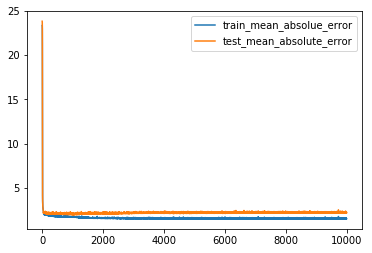

In [12]:
plt.plot(history.history['mae'], label = "train_mean_absolue_error")
plt.plot(history.history['val_mae'],label="test_mean_absolute_error")
plt.legend()
plt.show

### Step VIII: Prediction of values

In [13]:
y_pred = model.predict(x_test)

In [14]:
accuracy = r2_score(y_test,y_pred)
accuracy

0.8698656222168328

##### Here the Accuracy is coming as 87% which considered as more than enough.

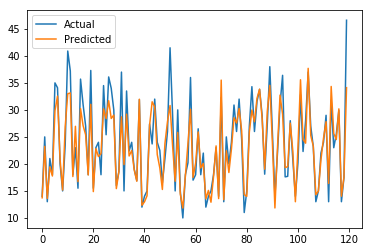

In [14]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()

##### Similarity in the values for the train data output and predicted values

### Step IX: Saving the Model

In [15]:
model.save("Car Model.h5")

#### This model will be later used in the app.

## To check the actual efficiency of the model a model using RandomForestsRegressor has been made with the same dataset

In [15]:
reg = RandomForestRegressor(n_estimators=10,random_state=0)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
yp = reg.predict(x_test)
accuracy = r2_score(y_test,yp)
accuracy

0.8767272625672837

###### We can see that with the RanomForestsRegressor the accuracy is alos coming as 87% as well but saving and using this model is not possible, The model 'Car Model.h5' is going to be used for our app. 

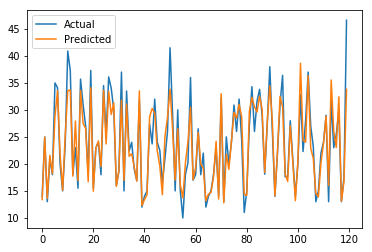

In [18]:
plt.plot(y_test, label = "Actual")
plt.plot(yp, label="Predicted")
plt.legend()